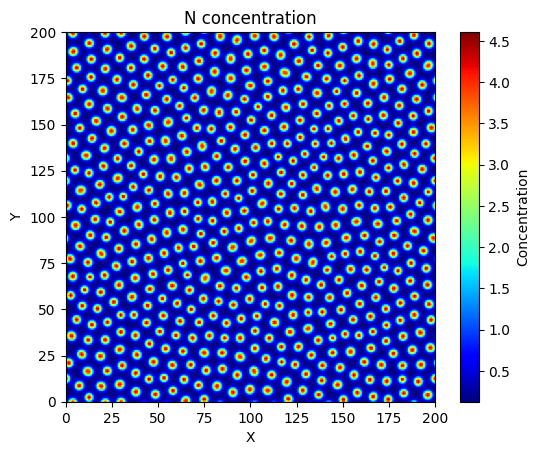

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set grid parameters
Lx, Ly = 200.0, 200.0  # Domain size
Nx, Ny = 200, 200    # Number of spatial grid points
# dx, dy = Lx / Nx, Ly / Ny
dt = 0.01  
dx,dy=(dt/0.005)**0.5,(dt/0.005)**0.5
            # Time step
Tmax = 100.0   # Time step
          # Maximum simulation time
Nt = int(Tmax / dt)

# Define constants
# eta=1
# h=0.5
# beta=0.3
# d=0.15
# sigma=0.78
# alpha=10.4
D1 = 1.0
D2 = 40.0
a = 0.1
b = 0.9
# Initialize arrays for N and P
N = np.maximum(0, np.random.rand(Nx, Ny))
P = np.maximum(0, np.random.rand(Nx, Ny))

# Create Laplacian operator
def laplacian(Z):
    Zxx = (np.roll(Z, 1, axis=0) - 2 * Z + np.roll(Z, -1, axis=0)) / dx**2
    Zyy = (np.roll(Z, 1, axis=1) - 2 * Z + np.roll(Z, -1, axis=1)) / dy**2
    return Zxx + Zyy
    
# def laplacian(Z):
#     return (
#         - 4 * Z
#         + np.roll(Z,1,axis=0) 
#         + np.roll(Z,-1,axis=0)
#         + np.roll(Z,+1,axis=1)
#         + np.roll(Z,-1,axis=1)
#     ) /(dx*dx)
# Perform time-stepping
for t in range(Nt):
    # Enforce boundary conditions (∂N/∂ν = ∂P/∂ν = 0)
    # N[0, :] = N[1, :]
    # N[-1, :] = N[-2, :]
    # N[:, 0] = N[:, 1]
    # N[:, -1] = N[:, -2]
    # P[0, :] = P[1, :]
    # P[-1, :] = P[-2, :]
    # P[:, 0] = P[:, 1]
    # P[:, -1] = P[:, -2]

    # Compute Laplacians
    laplace_N = laplacian(N)
    laplace_P = laplacian(P)

    # Update N and P using the given PDEs
    dN = a - N + (N**2) * P + D1*laplace_N
    dP = b -( N**2) * P+ D2* laplace_P

    N += dt * dN
    P += dt * dP

# Plot the result for variable N
plt.imshow(N, extent=[0, Lx, 0, Ly], origin='lower', cmap=plt.get_cmap('jet'))
plt.colorbar(label='Concentration')
plt.title("N concentration")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()